<a href="https://colab.research.google.com/github/achyutak/Project-2021/blob/main/Sikka_AI/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import glob
import zipfile
import random
import nltk
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize, wordpunct_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Extracting data to drive

In [ ]:
# import glob
# for i in glob.glob("*.zip"):
#   with zipfile.ZipFile('/content/' + i , 'r') as zip_ref:
#     zip_ref.extractall('/content')


In [ ]:
# cd /content/drive/MyDrive/Project-2021

In [ ]:
# mkdir Sikka_AI
# # cd Sikka_AI/

In [ ]:
# mv /content/sample_submission.csv ./

#Data Exploration


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project-2021/Sikka_AI/train.csv')

In [ ]:
df.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.id.describe()

count               159571
unique              159571
top       d029e281145db352
freq                     1
Name: id, dtype: object

In [ ]:
df.comment_text.describe()

count                                                159571
unique                                               159571
top       Please stop adding inappropriate external link...
freq                                                      1
Name: comment_text, dtype: object

In [ ]:
df.toxic.describe()

count    159571.000000
mean          0.095844
std           0.294379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: toxic, dtype: float64

In [ ]:
df.severe_toxic.describe()

count    159571.000000
mean          0.009996
std           0.099477
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: severe_toxic, dtype: float64

In [ ]:
df.obscene.describe()

count    159571.000000
mean          0.052948
std           0.223931
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: obscene, dtype: float64

In [ ]:
df.threat.describe()

count    159571.000000
mean          0.002996
std           0.054650
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: threat, dtype: float64

In [ ]:
df.insult.describe()

count    159571.000000
mean          0.049364
std           0.216627
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: insult, dtype: float64

In [ ]:
df.identity_hate.describe()

count    159571.000000
mean          0.008805
std           0.093420
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: identity_hate, dtype: float64

In [ ]:
new_df = df.copy()

In [ ]:
new_df['Number_of_categories'] = new_df['identity_hate'] + new_df['insult'] + new_df['obscene'] + new_df['severe_toxic'] + new_df['threat'] + new_df['toxic']

In [ ]:
new_df.Number_of_categories.describe()

count    159571.000000
mean          0.219952
std           0.748260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: Number_of_categories, dtype: float64

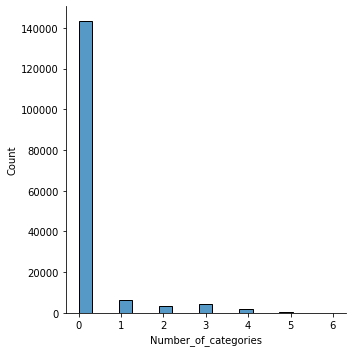

In [ ]:
sns.displot(new_df.Number_of_categories)

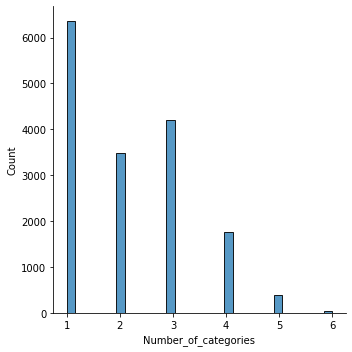

In [ ]:
sns.displot(new_df.Number_of_categories[new_df['Number_of_categories'] > 0])

In [ ]:
new_df[new_df.Number_of_categories == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      7,      8,
                 9,     10,
            ...
            159561, 159562, 159563, 159564, 159565, 159566, 159567, 159568,
            159569, 159570],
           dtype='int64', length=143346)

There are roughly 17000 (16225 to be precise) comments that belong to one of the 6 categories. The remaining 143346 of 159571 comments do not have any toxicity. This distribution may make the ML method biased.

In [ ]:
index_list_none = random.sample(set(new_df[new_df.Number_of_categories == 0].index),20000)

In [ ]:
index_list_atleast_one = new_df[new_df.Number_of_categories > 0].index

In [ ]:
drop_list = []
for i in new_df.index:
  if i not in index_list_none and i not in index_list_atleast_one:
    drop_list.append(i)

In [ ]:
new_df.drop(labels=drop_list,inplace=True)

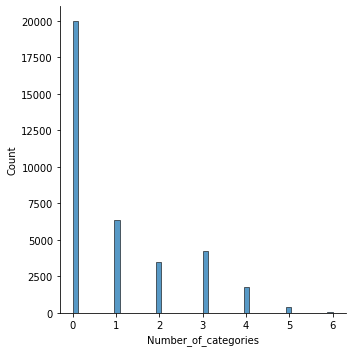

In [ ]:
sns.displot(data=new_df['Number_of_categories'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


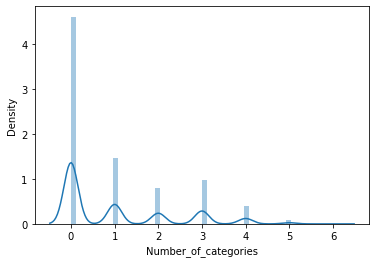

In [ ]:
sns.distplot(new_df['Number_of_categories'])

In [ ]:
new_df.reset_index(inplace=True)

# Cleaning the data


In [ ]:
new_df['comment_text']

0        Hey man, I'm really not trying to edit war. It...
1        "\nMore\nI can't make any real suggestions on ...
2             COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
3        Hey... what is it..\n@ | talk .\nWhat is it......
4        Bye! \n\nDon't look, come or think of comming ...
                               ...                        
36220    "\n\nHey listen don't you ever!!!! Delete my e...
36221                          Talkback: 15 September 2012
36222                           2005 (UTC)\n 06:35, 31 Mar
36223    and i'm going to keep posting the stuff u dele...
36224    The numbers in parentheses are the additional ...
Name: comment_text, Length: 36225, dtype: object

In [ ]:
def clean_text(text):
   
    # Convert text to all lowercase letters
    text = text.lower()
    
    # Remove whitespaces
    text = text.strip()
    
    # Tokenize text
    tokens = wordpunct_tokenize(text)
    
    # Remove all tokens that are not alphabetic   r[A-Za-z#]
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Remove tokens less than three letters
    # tokens = [token for token in tokens if not len(token)<4]
    
    # Remove punctuations
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lemmetize tokens
    # tokens = [lemmatizer.lemmatize(token,pos='n') for token in tokens]
    
    # Stem tokens
    #tokens = 
    
    # Re-create text from filtered tokens, so that vectorizer won't complain
    # text = ' '.join(tokens)
    return tokens

In [ ]:
train_df = new_df.copy()

In [ ]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: clean_text(x))

In [ ]:
train_df.comment_text

0        [hey, man, really, trying, edit, war, guy, con...
1        [make, real, suggestions, improvement, wondere...
2                         [cocksucker, piss, around, work]
3        [hey, talk, exclusive, group, wp, talibans, go...
4          [bye, look, come, think, comming, back, tosser]
                               ...                        
36220    [hey, listen, ever, delete, edits, ever, annoy...
36221                                [talkback, september]
36222                                           [utc, mar]
36223    [going, keep, posting, stuff, u, deleted, fuck...
36224    [numbers, parentheses, additional, decimal, po...
Name: comment_text, Length: 36225, dtype: object